In [5]:
#Wasif Mostofa
#HW 1
#01/30/2026
#Experimental Design
import os
os.chdir("/content")
!rm -rf STAT-7220-Applied-Experimental-Design
print(os.getcwd())

/content


In [6]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "wasifmostofa36"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/wasifmostofa36/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/wasifmostofa36/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 6, 2026**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

_The objective of this assignment is to determine whether aging time of the IPA affects the IBU (international bitterness levels)_

**Question 2.** Specify the outcome variable

_The outcome variable is the IBU value_

**Question 3.** Specify the independent variable. What are some possible lurking variables?

_the independent variable is the number of weeks. Possible lurking variables would be the ingrediants used initally to create the IPA. This could create an already high baseline of bitterness. Another example could be the storage unit in which the IPA liquid is housed._

**Question 4.** Briefly explain why a completely randomized design may be appropriate for this experiment.

_A CRD would be appropriate here because we have three mutually exclusive options for the independent variable. We'd like to compare and no other knowable sources of variation from lurking variables. We are randomly selecting bottles from each aging time without many other sources of variation that we would need to control for in a more complex design._


**Question 5.** State the null and alternative hypotheses for this experiment.

let's specify $H_0$ and $H_1$:

$$ \begin{align}
H_0&: \text{Mean IBUs for 3,4,or 5 weeks for aging time are the same} \\
H_1&: \text{Mean IBUs for aging weeks 3,4 or 5 weeks are different}
\end{align}
$$



**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
           mean       std
Weeks                    
3 Weeks  49.216  8.300656
4 Weeks  62.751  8.250384
5 Weeks  69.725  5.631258


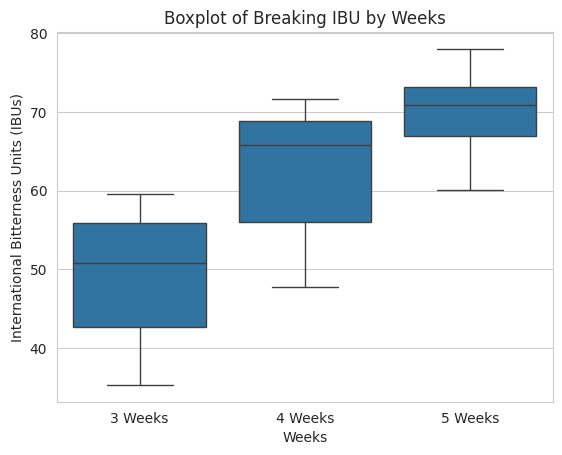

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import CSV
ipa = pd.read_excel("IPA.xlsx")
ipa.info()

## Calculate Group Means and Standard Deviations ##

summary_stats = ipa.groupby('Weeks')['IBU'].agg(['mean','std'])

print(summary_stats)

## Generate Boxplots for Visual Comparison ##

## Set a nice minimal style for plot ##

sns.set_style("whitegrid")

## Create boxplot using seaborn ##

sns.boxplot(x="Weeks",y="IBU",data=ipa)

## Add Title and Labels using matplotlib ##

plt.title("Boxplot of Breaking IBU by Weeks", loc='center')
plt.xlabel("Weeks")
plt.ylabel("International Bitterness Units (IBUs)")
plt.show()

- To interpret these results, we can see that average IBU does increase as we increase the aging time. The standard deviation is similar at 3-4 weeks but drops at 5 weeks. This may mean that the 5 week values are a bit more clustered. Also the box plot for the 5 week time is small which indicates a more consistent result (less spread)

- From 3 to 4 weeks the average difference is about 13.535 (62.751-49.216).
Using the average STD of all 3 (7.39) suggests a large shift. 13.535 / 7.39 ≈ 1.83σ.
- From 4 Weeks to 5 Weeks, the mean increases by about 6.974, which is .94σ less significant shift. This means moving from 3 → 4 weeks corresponds to a noticeably higher typical result, and 4 → 5 weeks still improves but by a smaller amount.


**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?


            df      sum_sq      mean_sq          F    PR(>F) Significant
Weeks      2.0  2174.83994  1087.419970  19.339842  0.000006         Yes
Residual  27.0  1518.12718    56.226933        NaN       NaN          No


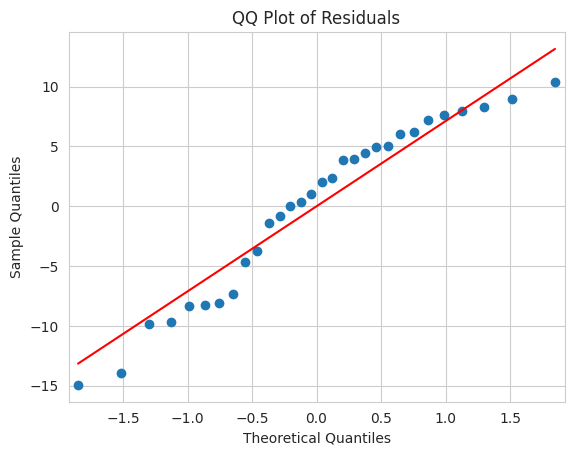

In [24]:
## Import Libraries ##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
## Install scipy package ##

#%pip install scipy ##

## Import scipy ##

import scipy.stats as stats

## Fit One Way ANOVA Model ##

ipa_mod = ols("IBU~Weeks",data=ipa).fit()

## Print ANOVA Table Adding Significance Column ##

tab = sm.stats.anova_lm(ipa_mod,typ=1)

tab["Significant"] = np.where(tab["PR(>F)"]<0.05,"Yes","No")

print(tab)

## Extract Model Residuals ##

residuals = ipa_mod.resid
## Generate QQ plot using seaborn ##

sm.qqplot(residuals, line ='s')
plt.title("QQ Plot of Residuals")
plt.show()

- As we can see, most of the points fall near the line bisecting the graph, with very minimal deviation.

- While the residuals do follow a linear path, there does suggest some tail behavior.

- **I would conclude that the Q-Q plot gives us evidence in support of a normality assumption with a light tailed distribution.**

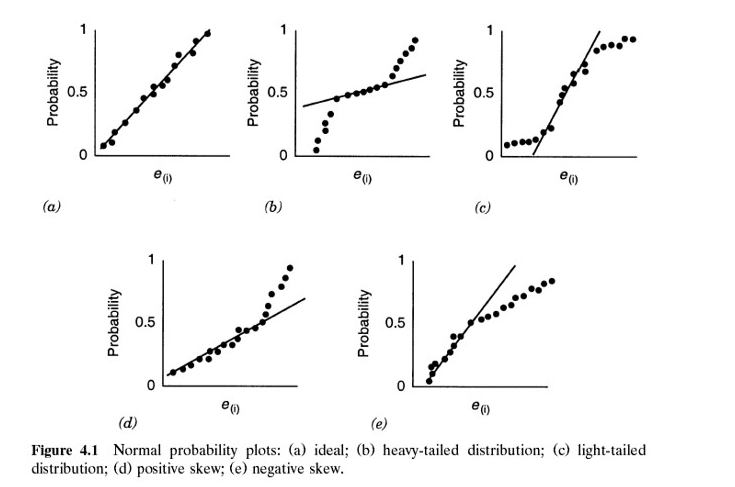

In [21]:
## Perform Shapiro-Wilk Test of Normality ##
sw_test = stats.shapiro(residuals)
## Extract Test Stat and P-Value ##
sw_stat = sw_test.statistic
sw_pvalue = sw_test.pvalue
## Print Results ##
print(f"Shapiro-Wilk Test Statistic: {sw_stat:.4f}")
print(f"Shapiro-Wilk Test P-Value: {sw_pvalue:.4f}")
if sw_pvalue > 0.05:
    print("Fail to reject null hypothesis: Residuals are normally distributed.")
else:
    print("Reject null hypothesis: Residuals are not normally distributed.")

Shapiro-Wilk Test Statistic: 0.9341
Shapiro-Wilk Test P-Value: 0.0630
Fail to reject null hypothesis: Residuals are normally distributed.


- Here we get both the test statistic (W = .9341
) as well as its associated p-value (P = .0649
).

- Since P > alpha = .05
, this tells us the data more strongly support the null hypothesis, meaning that the assumption of normality is supported by the data.

- **This result, along with a relatively good looking Q-Q plot, means that we can feel confident that the normality assumption is reasonably supported by our data.**

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?


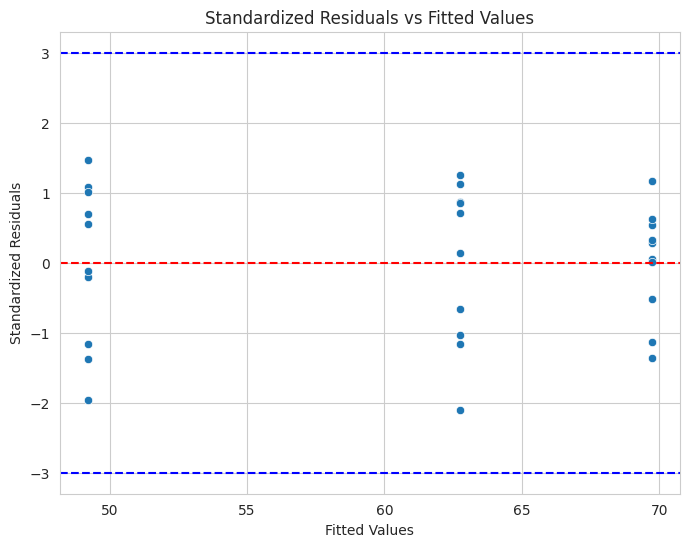

In [22]:
## Obtain Standardized Residuals ##

standardized_residuals = ipa_mod.get_influence().resid_studentized_internal

## Get the fitted values ##

fitted_values = ipa_mod.fittedvalues

## Create the plot using seaborn ##

plt.figure(figsize=(8,6))
sns.scatterplot(x=fitted_values, y=standardized_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(3, color='blue', linestyle='--')
plt.axhline(-3, color='blue', linestyle='--')
plt.title("Standardized Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

- we don't see any points greater than +3 or less than -3, which means that we are not observing any obvious outliers.
- As we can see, for each group mean (shown by the vertical lines), the residuals are mostly centered around 0, which implies that the residual mean being approximately 0 seems reasonable.
- If the constant variance assumption is met, we would expect these lengths to be roughly equal. If not, we would expect to see some lengths much larger than others. In this case, the lengths seem to be relatively similar across all groups.
-  **I would conclude that the homogeneity variance assumption is reasonably supported by the data.**




In [23]:
## Import necessary function: ##

from statsmodels.stats.diagnostic import het_breuschpagan

## Run B-P Test ##

bp_test = het_breuschpagan(ipa_mod.resid,ipa_mod.model.exog)

## Extract F-statistic ##

f_statistic = bp_test[2]

## Extract its P-Value ##

f_p_value = bp_test[3]

print(f"BP Test F-statistic: {f_statistic}")
print(f"BP Test F p-value: {f_p_value}")
if f_p_value > 0.05:
    print("Fail to reject null hypothesis: Homoscedasticity detected. Constant Variance assumed.")
else:
    print("Reject null hypothesis: Heteroscedasticity detected. Constant Variance not assumed.")

BP Test F-statistic: 1.2952914537529732
BP Test F p-value: 0.2902941540365849
Fail to reject null hypothesis: Homoscedasticity detected. Constant Variance assumed.


- Used the Bruesch-Pagan Test, which is a more general test that can be used to evaluate the homogeneity variance assumption on any linear model based on the normality assumption, including multiple linear regression.


- Since our p-value greater than 0.05, and since the scatterplot of standardized residuals to fitted values looks good
- **I feel comfortable assuming the data support both our normality and homogeneity variance assumption.**

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?




In [25]:
## Fit One-Way ANOVA Model ##
ipa_mod = ols("IBU~Weeks",data=ipa).fit()

## Print ANOVA Table Adding Significance Column ##

tab = sm.stats.anova_lm(ipa_mod,typ=1)

tab["Significant"] = np.where(tab["PR(>F)"]<0.05,"Yes","No")

print(tab)

            df      sum_sq      mean_sq          F    PR(>F) Significant
Weeks      2.0  2174.83994  1087.419970  19.339842  0.000006         Yes
Residual  27.0  1518.12718    56.226933        NaN       NaN          No


Our $F_{\text{Stat}} = 19.34$ and has an associated p-value of 0.0001.

- This indicates that our data more strongly support the alternative hypothesis, if we use our traditional $\alpha$-level of 0.05.

- Contextually, this means that at least two of the Age groups have mean ratings which may meaningfully differ, from a statistical perspective.


**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.


- To evaluate this using an inferential method, we must employ a **post-hoc test**.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
3 Weeks 4 Weeks   13.535 0.0011  5.2205 21.8495   True
3 Weeks 5 Weeks   20.509    0.0 12.1945 28.8235   True
4 Weeks 5 Weeks    6.974 0.1131 -1.3405 15.2885  False
------------------------------------------------------


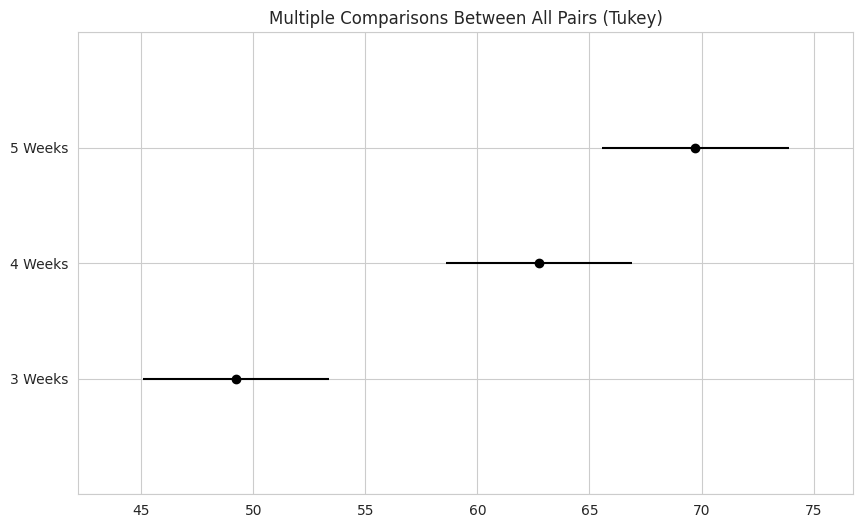

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Perform Tukey's HSD test ##

tukey_result = pairwise_tukeyhsd(endog=ipa['IBU'], groups=ipa['Weeks'],
                                 alpha=0.05)

## Print Tukey Visualization ##

tukey_result.plot_simultaneous()

## Print Tukey Table ##

print(tukey_result)

- These results, as shown by the adjusted $p < 0.05$, indicate that the mean rating for 5 weeks is greater than both the 3 and 4 weeks mean IBU.

- However, the difference in mean IBU between 4 and 5 weeks was not found to be statistically different.

- So as we noted during the descriptive analysis:
  - From 3 to 4 weeks the average difference is about 13.535 (62.751-49.216). Using the average STD of all 3 (7.39) suggests a large shift. 13.535 / 7.39 ≈ 1.83σ.
  - From 4 Weeks to 5 Weeks, the mean increases by about 6.974, which is .94σ less significant shift. This means moving from 3 → 4 weeks corresponds to a noticeably higher typical result, and 4 → 5 weeks still improves but by a smaller amount

- Post-Hoc methods, like Tukey's HSD, adjust the Type I error rate (When testing for the Alt Hypothesis when you should be doing the Null Hypothesis instead) to maintain the desired overall significance level, $\alpha$.

- Post-Hoc also tests simultaneously all group means, which provides a more efficient approach in identifying potentially significant differences

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses. Additionally, describe any limitations of the experiment and/or your analyses, and suggest potential improvements for future experiments of this nature.

- Throughout this analysis, I felt like I was able to put my 'feelings' into something calculable.
- For example when I did the inital inferinal analysis, I 'felt' like the jump 3 to 4 weeks was significant but the jump from 4 to 5 weeks was not that big of a deal. After doing the Tukey's HSD, I was able to conclude numerically that the mean averages was not significant enough.
- If a Brewery hired a data scientist to analyze if waiting an extra week was worth it because bitter IPAs = higher profits, maybe this data analysis could lead to executive cutting costs and just sticking with 4 week age period instead of paying for more resoucrces and wait an extra week
- One thing I would want to note is that the Sample Size is a bit small. There were only 29 observations. Increasing the sample size to gather more data would definitely help
- Lastly, since I am not a expert in IPA making, there may be a lot more hidden/lurking variables that contribute to the 'bitterness' of the beer. We cannot defiantly say that increasing age time increases bitterness. Given the limited data we have, we can say that the data suggests that increasing 'age of waiting' could increase bitterness.